In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mydata = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Financial-Analytics-Loan-Approval-Prediction/main/loan_prediction.csv')

In [3]:
mydata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
mydata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
mydata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
mydata = pd.get_dummies(mydata, columns=['Gender'])

In [7]:
mydata.head(10)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1
5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0,1
6,LP001013,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0,1
7,LP001014,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,0,1
8,LP001018,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,0,1
9,LP001020,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,0,1


In [8]:
mydata = pd.get_dummies(mydata, columns=['Loan_Status'])

In [9]:
mydata.head(10)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Loan_Status_N,Loan_Status_Y
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0,1,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,1,0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0,1,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0,1,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0,1,0,1
5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,0,1,0,1
6,LP001013,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,0,1,0,1
7,LP001014,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,1,1,0
8,LP001018,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,0,1,0,1
9,LP001020,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,1,1,0


In [10]:
mydata.drop("Gender_Female", axis=1, inplace=True)

In [11]:
mydata.drop("Loan_Status_N", axis=1, inplace=True)

In [12]:
mydata.head(10)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Loan_Status_Y
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1,0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,1
5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,1
6,LP001013,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,1
7,LP001014,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,1,0
8,LP001018,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1,1
9,LP001020,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,1,0


In [13]:
mydata = pd.get_dummies(mydata, columns=['Married'])

<AxesSubplot:xlabel='Loan_Status_Y', ylabel='Gender_Male'>

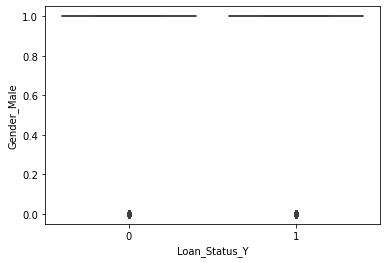

In [14]:
sns.boxplot(x="Loan_Status_Y", y="Gender_Male", data=mydata)

In [15]:
mydata = pd.get_dummies(mydata, columns=['Self_Employed'])

In [16]:
mydata = pd.get_dummies(mydata, columns=['Education'])

In [17]:
mydata.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Loan_Status_Y,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Urban,1,1,1,0,1,0,1,0
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0,1,1,0,1,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,1,0,1,1,0
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Urban,1,1,1,0,1,0,1,0


In [18]:
mydata = pd.get_dummies(mydata, columns=['Property_Area'])

In [19]:
mydata.head()


,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Loan_Status_Y,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,0,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1,0,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,1,1,0,1,0,1,0,0,0,1


In [20]:
mydata.drop("Property_Area_Semiurban", axis=1, inplace=True)

In [21]:
mydata.drop("Education_Not Graduate", axis=1, inplace=True)

In [22]:
mydata.drop("Married_No", axis=1, inplace=True)

In [23]:
mydata.drop("Self_Employed_No", axis=1, inplace=True)

<AxesSubplot:xlabel='Loan_Status_Y', ylabel='Married_Yes'>

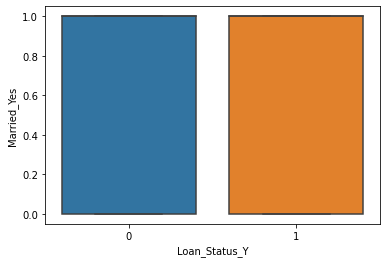

In [24]:
sns.boxplot(x="Loan_Status_Y", y="Married_Yes", data=mydata)

In [25]:
mydata.median()

C:\Users\ANURAG~1\AppData\Local\Temp/ipykernel_13420/4112977807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.median()


ApplicantIncome        3812.5
CoapplicantIncome      1188.5
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Gender_Male               1.0
Loan_Status_Y             1.0
Married_Yes               1.0
Self_Employed_Yes         0.0
Education_Graduate        1.0
Property_Area_Rural       0.0
Property_Area_Urban       0.0
dtype: float64

In [26]:
mydata.drop("Loan_ID", axis=1, inplace=True)

In [27]:
mydata["Dependents"] = mydata["Dependents"].replace('3+',int(3))
mydata["Dependents"] = mydata["Dependents"].replace('1',int(1))
mydata["Dependents"] = mydata["Dependents"].replace('2',int(2))
mydata["Dependents"] = mydata["Dependents"].replace('0',int(0))


In [28]:
medianFiller = lambda x:x.fillna(x.median())
mydata = mydata.apply(medianFiller, axis=0)

In [29]:
x=mydata.drop("Loan_Status_Y", axis=1)
y=mydata["Loan_Status_Y"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [31]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
predictions=model.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7891891891891892

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7891891891891892

In [65]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=0)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [66]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.7351351351351352


In [67]:
from sklearn import svm

In [68]:
clf = svm.SVC(gamma=0.05, C=3)

In [69]:
clf.fit(x_train, y_train)

SVC(C=3, gamma=0.05)

In [70]:
y_pred = clf.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6756756756756757

In [72]:
bgcl = BaggingClassifier(n_estimators=50, base_estimator=dTree, random_state=0)
bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test, y_test))

0.7783783783783784


In [73]:
abcl = AdaBoostClassifier(n_estimators=100, random_state=0)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)
print(abcl.score(x_test, y_test))

0.7675675675675676


In [74]:
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=0)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))

0.7891891891891892


In [75]:
rfcl = RandomForestClassifier(n_estimators=50, random_state=0, max_features=3)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))

0.7837837837837838
